In [88]:
import pandas as pd
import numpy as np
import math
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import plotly.express as px

In [89]:
df = pd.read_csv('../Missing_Migrants_Global_Figures_allData.csv')

In [90]:
df.head()

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1,0,1,...,Central America,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-110.366453 31.650259),Northern America,NaN,5.0,http://humaneborders.info/
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-111.73756 31.59713),Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-113.01125 31.94026),Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1,0,1,...,Central America,Violence,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",POINT (-109.315632 31.506777),Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1,0,1,...,Northern Africa,Harsh environmental conditions / lack of adequ...,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),POINT (28 59.1551),Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11172 entries, 0 to 11171
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              11172 non-null  object 
 1   Incident ID                          11172 non-null  object 
 2   Incident Type                        11172 non-null  object 
 3   Region of Incident                   11172 non-null  object 
 4   Website Date                         11157 non-null  object 
 5   Incident year                        11172 non-null  int64  
 6   Reported Month                       11172 non-null  object 
 7   Number of Dead                       11172 non-null  int64  
 8   Minimum Estimated Number of Missing  11172 non-null  int64  
 9   Total Number of Dead and Missing     11172 non-null  int64  
 10  Number of Survivors                  11172 non-null  int64  
 11  Number of Females           

In [92]:
df.isna().any()

Main ID                                False
Incident ID                            False
Incident Type                          False
Region of Incident                     False
Website Date                            True
Incident year                          False
Reported Month                         False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Country of Origin                       True
Region of Origin                        True
Cause of Death                         False
Migration route                         True
Location of death                      False
Information Source                      True
Coordinates                             True
UNSD Geographical Grouping              True
Article ti

In [93]:
df[(df['Migration route'].isna()) & (df['Coordinates'].isna())][['Location of death','Region of Incident','Coordinates']]

,Location of death,Region of Incident,Coordinates
10578,At kilometer 300 of the Cordoba-Veracruz highw...,Central America,NaN
10581,"Las Acacias, Cúcuta-Puerto Santander, Cúcuta, ...",South America,NaN


In [94]:
df[df['Country of Origin'].isna()][['Location of death','Region of Incident','Country of Origin','Region of Origin']]

,Location of death,Region of Incident,Country of Origin,Region of Origin
132,Boat drifting in Libyan waters,Mediterranean,NaN,Unknown
185,"Off the shore of al-Qarbouli, Libya",Mediterranean,NaN,Unknown
254,Multiple locations,Eastern Africa,NaN,Unknown
423,"Trafficking camps in Phang Nga province, Thailand",South-eastern Asia,NaN,South-eastern Asia
761,"Xaloztoc, Tlaxcala, Mexico",Central America,NaN,Latin America / Caribbean (P)
922,Pima Country Office of the Medical Examiner ju...,North America,NaN,Central America
965,"off the coast of Cesme, Izmir, Turkey, en rout...",Mediterranean,NaN,Western Asia
974,"All American Canal, CA near Calexico",North America,NaN,Central America
1003,"Sabha, Libya",Northern Africa,NaN,Eastern Africa (P)


In [95]:
df[df['Region of Origin'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
10781,2022.MMP604,2022.MMP604,Incident,Mediterranean,2022-06-04,2022,June,1,0,1,...,NaN,Drowning,Central Mediterranean,"Remains washed ashore at Almutrid, West Zawiya...",IOM Libya,POINT (12.611113 32.79373156),Uncategorized,NaN,4.0,NaN


In [96]:
df['Region of Origin'].value_counts()

Latin America / Caribbean (P)                            1904
Unknown                                                  1558
Sub-Saharan Africa (P)                                   1435
Southern Asia                                            1380
Central America                                          1368
                                                         ... 
Sub-Saharan Africa (P), Western Africa, Middle Africa       1
Northern Africa, Western Africa, Middle Africa              1
Sub-Saharan Africa, Southern Asia                           1
Mixed, Northern Africa, Western Africa                      1
South America, Caribbean, South America (P)                 1
Name: Region of Origin, Length: 122, dtype: int64

In [97]:
df['Country of Origin'].value_counts()

Unknown                                                                             6555
Afghanistan                                                                         1198
Mexico                                                                               622
Syrian Arab Republic                                                                 290
Honduras                                                                             282
                                                                                    ... 
Unknown, Mali, Côte d'Ivoire                                                           1
Mixed, Bangladesh                                                                      1
Nigeria, Mali, Senegal, Guinea, Côte d'Ivoire, Central African Republic, Liberia       1
Georgia                                                                                1
Kyrgyzstan                                                                             1
Name: Country of Orig

In [98]:
df[df['Coordinates'].isna()]['Migration route']

231          Central Mediterranean
256      US-Mexico border crossing
257      US-Mexico border crossing
258      US-Mexico border crossing
259      US-Mexico border crossing
260      US-Mexico border crossing
261      US-Mexico border crossing
262      US-Mexico border crossing
263      US-Mexico border crossing
264      US-Mexico border crossing
265      US-Mexico border crossing
267      US-Mexico border crossing
270      US-Mexico border crossing
271      US-Mexico border crossing
272      US-Mexico border crossing
273      US-Mexico border crossing
274      US-Mexico border crossing
275      US-Mexico border crossing
276      US-Mexico border crossing
277      US-Mexico border crossing
278      US-Mexico border crossing
279      US-Mexico border crossing
280      US-Mexico border crossing
281      US-Mexico border crossing
282      US-Mexico border crossing
283      US-Mexico border crossing
284      US-Mexico border crossing
285      US-Mexico border crossing
286      US-Mexico b

In [99]:
df['Migration route'].value_counts()

US-Mexico border crossing                                2978
Sahara Desert crossing                                   1963
Afghanistan to Iran                                      1063
Central Mediterranean                                     909
Western Mediterranean                                     537
Eastern Mediterranean                                     297
Western Africa / Atlantic route to the Canary Islands     190
Western Balkans                                           172
Türkiye-Europe land route                                 129
Syria to Türkiye                                          128
English Channel to the UK                                 127
Horn of Africa to Yemen crossing                           65
Darien Gap                                                 47
Dominican Republic to Puerto Rico                          35
Iran to Türkiye                                            33
Italy to France                                            32
Caribbea

In [100]:
df['UNSD Geographical Grouping'].value_counts()

Northern America      2399
Uncategorized         1989
Northern Africa       1755
Southern Asia         1170
Central America       1137
Western Africa         918
Eastern Africa         403
Western Asia           297
Southern Europe        291
South-eastern Asia     214
South America          185
Western Europe         148
Caribbean               93
Middle Africa           73
Eastern Europe          61
Northern Europe         20
Southern Africa          9
Eastern Asia             8
Central Asia             1
Name: UNSD Geographical Grouping, dtype: int64

In [101]:
df[df['UNSD Geographical Grouping'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
5356,2018.MMP02190,2018.MMP02190,Incident,North America,2018-02-17,2018,February,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,NaN,POINT (-113.367348 33.061615),NaN,NaN,NaN,NaN


In [102]:
df[df['Coordinates'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
231,2014.MMP00237,2014.MMP00237,Incident,Mediterranean,2014-10-29,2014,October,0,20,20,...,Unknown,Drowning,Central Mediterranean,off the coast of Libya,Mail Online and IOM Rome,NaN,Uncategorized,Twenty African migrants drown in Mediterranean...,4.0,http://dailym.ai/1EczOFt
256,2014.MMP01000,2014.MMP01000,Incident,North America,2014-01-02,2014,January,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,NaN,Northern America,NaN,5.0,http://humaneborders.info/
257,2014.MMP01001,2014.MMP01001,Incident,North America,2014-02-26,2014,February,1,0,1,...,Latin America / Caribbean (P),Harsh environmental conditions / lack of adequ...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,NaN,Northern America,NaN,5.0,http://humaneborders.info/
258,2014.MMP01002,2014.MMP01002,Incident,North America,2014-03-27,2014,March,1,0,1,...,Latin America / Caribbean (P),Violence,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,NaN,Northern America,NaN,5.0,http://humaneborders.info/
259,2014.MMP01003,2014.MMP01003,Incident,North America,2014-04-12,2014,April,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,NaN,Northern America,NaN,5.0,http://humaneborders.info/
260,2014.MMP01004,2014.MMP01004,Incident,North America,2014-04-15,2014,April,1,0,1,...,Latin America / Caribbean (P),Violence,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,NaN,Northern America,NaN,5.0,http://humaneborders.info/
261,2014.MMP01005,2014.MMP01005,Incident,North America,2014-05-03,2014,May,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,NaN,Northern America,NaN,5.0,http://humaneborders.info/
262,2014.MMP01006,2014.MMP01006,Incident,North America,2014-06-17,2014,June,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,NaN,Northern America,NaN,5.0,http://humaneborders.info/
263,2014.MMP01007,2014.MMP01007,Incident,North America,2014-06-17,2014,June,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,NaN,Northern America,NaN,5.0,http://humaneborders.info/
264,2014.MMP01008,2014.MMP01008,Incident,North America,2014-07-06,2014,July,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,NaN,Northern America,NaN,5.0,http://humaneborders.info/


In [103]:
def get_xy(point):
    if pd.notnull(point):
        arr = point.replace('(','').replace(')','').split(' ')
        return pd.Series({   # returns a row with column labels B and C
            "X": float(arr[1]),
            "Y": float(arr[2])
        })
    else:
        return pd.Series({   # returns a row with column labels B and C
            "X": None,
            "Y": None
        })

In [104]:
df['Coordinates'].iloc[0].replace('(','').replace(')','').split(' ')

['POINT', '-110.366453', '31.650259']

In [105]:
df = pd.concat([df, df["Coordinates"].apply(lambda x: get_xy(x))], axis=1)

In [106]:
df

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL,X,Y
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1,0,1,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-110.366453 31.650259),Northern America,NaN,5.0,http://humaneborders.info/,-110.366453,31.650259
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1,0,1,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-111.73756 31.59713),Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN,-111.737560,31.597130
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1,0,1,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-113.01125 31.94026),Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN,-113.011250,31.940260
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1,0,1,...,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",POINT (-109.315632 31.506777),Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00,-109.315632,31.506777
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1,0,1,...,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),POINT (28 59.1551),Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR,28.000000,59.155100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11167,2022.MMP996,2022.MMP996,Incident,Europe,2022-08-11,2022,August,2,0,2,...,Türkiye-Europe land route,"Bulgarian side of the border near Topçular, Ko...",IOM Edirne Türkiye,POINT (27.160306 42.06719),Eastern Europe,NaN,4.0,NaN,27.160306,42.067190
11168,2022.MMP997,2022.MMP997,Incident,Europe,2022-08-13,2022,August,1,0,1,...,Türkiye-Europe land route,"Greek side of the border, Evros River, near Ra...",IOM Edirne Türkiye,POINT (26.464278 41.288319),Western Asia,NaN,4.0,NaN,26.464278,41.288319
11169,2022.MMP998,2022.MMP998,Incident,Europe,2022-08-11,2022,August,1,0,1,...,Türkiye-Europe land route,"Unspecified location in the woods in Greece, n...",IOM Edirne Türkiye,POINT (25.969797 41.13261),Southern Europe,NaN,4.0,NaN,25.969797,41.132610
11170,2022.MMP999,2022.MMP999,Incident,Western Asia,2022-08-20,2022,August,1,0,1,...,Türkiye-Europe land route,Unspecified location between the Evros River a...,IOM Edirne Türkiye,POINT (26.312146 41.08284),Western Asia,NaN,4.0,NaN,26.312146,41.082840


In [107]:
def dist(p1, p2):
    """ Distance between two points, format: (x, y) """
    return np.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)

In [108]:
def get_closer_coor(dfe,row):
    p = (row['X'], row['Y'])
    x = np.sqrt((dfe['X']- p[0])**2 + (dfe['Y']-p[1])**2)
    return dfe.iloc[x.argsort().iloc[0]]

In [109]:
df2 = df[(df['Migration route'].isna()) & (~df['Coordinates'].isna())]

In [110]:
df2.apply(lambda x: get_closer_coor(df[~df['Coordinates'].isna()],x),axis=1)

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL,X,Y
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1,0,1,...,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),POINT (28 59.1551),Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR,28.000000,59.155100
15,2014.MMP00016,2014.MMP00016,Incident,Caribbean,2014-01-30,2014,January,1,0,1,...,NaN,"Off the coast of Fort Lauderdale, Florida",Local10.com,POINT (-80 26.116),Caribbean,Boat with Haitian migrants washes up South Flo...,1.0,http://bit.ly/1zU2LSq,-80.000000,26.116000
16,2014.MMP00017,2014.MMP00017,Cumulative Incident,South-eastern Asia,2014-02-02,2014,February,5,0,5,...,NaN,"Hat Yai hospital, 182 Ratthakan, Hat Yai, Hat ...",Manager Online,POINT (100.4674982 7.0167471),South-eastern Asia,ทำพิธีฝังหมู่โรฮิงญา 5 ศพ ป่วยตายระหว่างถูกกัก...,1.0,https://archive.vn/fHipt,100.467498,7.016747
24,2014.MMP00025,2014.MMP00025,Incident,Caribbean,2014-02-20,2014,February,8,0,8,...,NaN,Dominican Republic,AP,POINT (-68 18.4505),Caribbean,Capsizing death toll rises to 8 Haitians,1.0,http://bit.ly/1sWDTeE,-68.000000,18.450500
28,2014.MMP00029,2014.MMP00029,Incident,Southern Asia,2014-02-26,2014,February,1,0,1,...,NaN,India,Daily Star,POINT (89 25.1841),Southern Asia,Bangladeshi killed in BSF firing,1.0,http://bit.ly/1vs5kco,89.000000,25.184100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11149,2022.MMP977,2022.MMP977,Incident,Europe,2022-08-21,2022,August,14,0,14,...,NaN,M5-Ural highway between the r.p. Novospasskoe ...,Investigative Committee of the Russian Federat...,POINT (47.413722 53.129278),Eastern Europe,"In the Ulyanovsk region, investigators of the ...",5.0,"https://archive.ph/ngeyj,https://archive.ph/yz...",47.413722,53.129278
11160,2022.MMP988,2022.MMP988,Incident,Central America,2022-08-23,2022,August,1,0,1,...,NaN,"Ravine near San Mateo Mendizabal, Amozoc de Mo...","Intolerancia Diario, Cinco Radio, Tele Diario,...",POINT (-98.077905 19.040736),Central America,Amozoc: fallece migrante tras arrojarse a barr...,3.0,"https://archive.ph/5DuQj,https://archive.ph/cJ...",-98.077905,19.040736
11161,2022.MMP989,2022.MMP989,Incident,Central America,2022-08-21,2022,August,1,0,1,...,NaN,"Llano Barroso, Barrio de la Soledad, Oaxaca, M...","Imparcial Oaxaca, Ultimas Noticias, Efeto Cocuyo",POINT (-95.066867 16.787201),Central America,Muere venezolano tras caer den tren,3.0,"https://archive.ph/cBDnI,https://archive.ph/KA...",-95.066867,16.787201
11164,2022.MMP992,2022.MMP992,Incident,Europe,2022-08-19,2022,August,1,0,1,...,NaN,"Hospital center in Vranje, Serbia.",IOM Serbia,POINT (21.904076 42.550741),Southern Europe,NaN,4.0,NaN,21.904076,42.550741


In [111]:
lists = []
for i,r in df2.iterrows():
    migration = get_closer_coor(df[(~df['Migration route'].isna())& (~df['Coordinates'].isna())],r)
    lists.append((i,migration))

In [112]:
df2.iloc[0]['Migration route'] = "Belarus-EU border"

C:\Users\srodriguezb\AppData\Local\Temp\ipykernel_19384\4209047027.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
df2.at[4,'Migration route'] ="Belarus-EU border"

In [114]:
df2.at[4,'Migration route']

'Belarus-EU border'

In [115]:
df['Migration route'].unique().tolist()

['US-Mexico border crossing',
 nan,
 'Eastern Mediterranean',
 'English Channel to the UK',
 'Western Mediterranean',
 'Central Mediterranean',
 'Horn of Africa to Yemen crossing',
 'Sahara Desert crossing',
 'Western Africa / Atlantic route to the Canary Islands',
 'Syria to Türkiye',
 'Western Balkans',
 'Caribbean to US',
 'Haiti to Dominican Republic',
 'Türkiye-Europe land route',
 'Dominican Republic to Puerto Rico',
 'Darien Gap',
 'Venezuela to Caribbean',
 'Iran to Türkiye',
 'Italy to France',
 'Afghanistan to Iran',
 'Comoros to Mayotte',
 'DRC to Uganda',
 'Belarus-EU border',
 'Ukraine to Europe']

In [116]:
df3 = df[(~df['X'].isna()) & (~df['Y'].isna())]

In [117]:
gm = GaussianMixture(n_components=24, random_state=0).fit(df3[['Y','X']].to_numpy())

In [118]:
gm.means_

array([[  22.75190272,  -99.30565852],
       [  35.88997298,   -3.16778253],
       [  21.26009759,   26.81109753],
       [  29.55951714,   59.57321856],
       [  32.11424041, -112.64124865],
       [  15.20606132,   95.69424894],
       [  18.03526638,    7.53852565],
       [  33.23101434,   12.89942346],
       [  12.8328246 ,   39.19783976],
       [  20.45052755,  -72.96299487],
       [  39.33900552,   26.59708066],
       [  -3.46058044,   12.49684796],
       [  27.55785602,  -99.31040925],
       [  13.89312576,   -0.45830016],
       [ -21.88416858,  -69.02077394],
       [  35.44890784,   17.97842099],
       [  31.56732766,  112.31975577],
       [  33.66777253,   51.78454723],
       [   5.19888834,   42.48303098],
       [  26.36283394,  -15.19582746],
       [  36.85594637,   39.27213948],
       [   6.77915467,  -75.48532773],
       [  50.9616336 ,    1.91433197],
       [  25.08387878,   13.97590329]])

In [119]:
gm.means_[16]

array([ 31.56732766, 112.31975577])

In [120]:
[(5,[15.20606,95.69425]),(16,[31.56732766,112.31975577])]

[(5, [15.20606, 95.69425]), (16, [31.56732766, 112.31975577])]

In [121]:
gm.means_[:,1]
gm.means_[:,0]

array([ 22.75190272,  35.88997298,  21.26009759,  29.55951714,
        32.11424041,  15.20606132,  18.03526638,  33.23101434,
        12.8328246 ,  20.45052755,  39.33900552,  -3.46058044,
        27.55785602,  13.89312576, -21.88416858,  35.44890784,
        31.56732766,  33.66777253,   5.19888834,  26.36283394,
        36.85594637,   6.77915467,  50.9616336 ,  25.08387878])

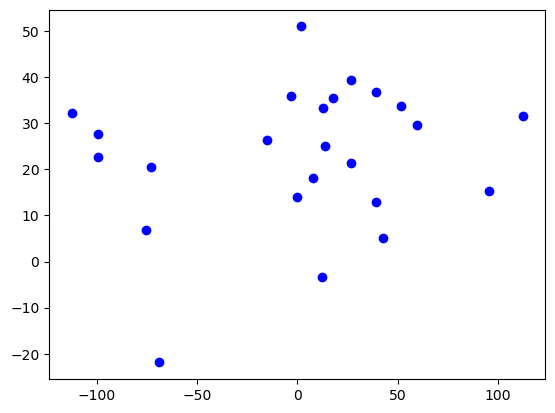

In [122]:
plt.scatter(gm.means_[:,1],gm.means_[:,0], c ="blue")
 
# To show the plot
plt.show()

In [123]:
plot = px.scatter_geo(gm.means_,lat=0,lon=1)
plot.show()

In [124]:
[[15.20606,95.69425],[31.56,112.31]]

[[15.20606, 95.69425], [31.56, 112.31]]

In [125]:
gm.predict(np.array([[25.31163,85.01739]]))[0]

5

In [126]:
for i,m in lists:
    #print(df.loc[i][['Migration route','X','Y']],m[['Migration route','X','Y']])
    df.at[i,'Migration route'] = m['Migration route']

In [145]:
df.iloc[0]['X'] != df.iloc[0]['X']

False

In [127]:
df.iloc[0]['X']

-110.366453

In [146]:
def get_asia_routes(x):
    if x['X'] == x['X'] and x['Y'] == x['Y']:
        pred = gm.predict(np.array([[x['Y'],x['X']]]))
        if pred[0] == 5 or pred[0] == 16:
            return 'Routes in Asia'
        else:
            return x['Migration route']
    else:
        return x['Migration route']

In [147]:
df['Migration route'] = df.apply(lambda x: get_asia_routes(x),axis=1)

In [148]:
df[df['Migration route'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL,X,Y
10578,2022.MMP1002,2022.MMP1002,Incident,Central America,2022-08-18,2022,August,1,0,1,...,NaN,At kilometer 300 of the Cordoba-Veracruz highw...,"Vanguardia de Veracruz,El Mundo",NaN,Central America,Se mata migrante cubana en mortal volcadura!,3.0,"https://archive.ph/ApQpJ,https://archive.ph/OhaC6",NaN,NaN
10581,2022.MMP1005,2022.MMP1005,Incident,South America,2022-08-17,2022,August,1,0,1,...,NaN,"Las Acacias, Cúcuta-Puerto Santander, Cúcuta, ...",Reporte Confidencial Venezuela,NaN,South America,Asesinaron a joven venezolano en Cúcuta,1.0,https://archive.ph/6sCeE,NaN,NaN


In [149]:
df[df['Migration route'] == 'Routes in Asia']

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL,X,Y
16,2014.MMP00017,2014.MMP00017,Cumulative Incident,South-eastern Asia,2014-02-02,2014,February,5,0,5,...,Routes in Asia,"Hat Yai hospital, 182 Ratthakan, Hat Yai, Hat ...",Manager Online,POINT (100.4674982 7.0167471),South-eastern Asia,ทำพิธีฝังหมู่โรฮิงญา 5 ศพ ป่วยตายระหว่างถูกกัก...,1.0,https://archive.vn/fHipt,100.467498,7.016747
28,2014.MMP00029,2014.MMP00029,Incident,Southern Asia,2014-02-26,2014,February,1,0,1,...,Routes in Asia,India,Daily Star,POINT (89 25.1841),Southern Asia,Bangladeshi killed in BSF firing,1.0,http://bit.ly/1vs5kco,89.000000,25.184100
33,2014.MMP00034,2014.MMP00034,Incident,South-eastern Asia,2014-03-09,2014,March,5,0,5,...,Routes in Asia,"Bypass Road, Moo 7, Bang Phra subdistrict, Sri...","Manager Online, INN News, Khomchudluek",POINT (101 13.2353642),South-eastern Asia,รถขนแรงงานต่างด้าวขับหลบหนีด่านตำรวจ ชนตอม่อสะ...,NaN,"https://archive.vn/aBj2m,https://archive.vn/d2...",101.000000,13.235364
34,2014.MMP00035,2014.MMP00035,Incident,South-eastern Asia,2014-03-09,2014,March,2,0,2,...,Routes in Asia,"Moo 13, 38th km of the 4006 Langsuan-Pato Road...","INN News, Manager Online, Daily News",POINT (99 9.96833),South-eastern Asia,กระบะขนพม่าเกิดอุบัติเหตุชุมพรดับ2สาหัส12,NaN,"https://archive.vn/0rFwG,https://archive.vn/PX...",99.000000,9.968330
65,2014.MMP00067,2014.MMP00067,Incident,South-eastern Asia,2014-04-21,2014,April,5,0,5,...,Routes in Asia,Border China/Vietnam,New York Times,POINT (107 21.5928),South-eastern Asia,Vietnam returns migrants to China after deadly...,1.0,http://nyti.ms/1kzuP6j,107.000000,21.592800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,2022.MMP814,2022.MMP814,Incident,North America,2022-06-30,2022,June,1,0,1,...,Routes in Asia,Pima County Office of the Medical Examiner jur...,Pima County Office of the Medical Examiner (PC...,POINT (112.03763 32.5016),Northern America,NaN,5.0,https://humaneborders.info/app/mapa.asp,112.037630,32.501600
10989,2022.MMP815,2022.MMP815,Incident,North America,2022-06-30,2022,June,1,0,1,...,Routes in Asia,Pima County Office of the Medical Examiner jur...,Pima County Office of the Medical Examiner (PC...,POINT (111.1719 32.0753),Northern America,NaN,5.0,https://humaneborders.info/app/mapa.asp,111.171900,32.075300
11041,2022.MMP867,2022.MMP867,Incident,South-eastern Asia,2022-07-16,2022,July,2,0,2,...,Routes in Asia,"Wat Thep Charoen intersection, Petchkasem road...","Manager Online, Thairath Online, Siamrath, Ama...",POINT (99.112142 10.62460568),South-eastern Asia,ชนยับดับ 3 ศพ กระบะขนแรงงานเถื่อนพุ่งออกจากถนน...,3.0,"https://archive.vn/azYkB,https://archive.vn/m9...",99.112142,10.624606
11089,2022.MMP916,2022.MMP916,Incident,South-eastern Asia,2022-08-08,2022,August,1,0,1,...,Routes in Asia,Waters off the coast of Selangor; location of ...,"Malay Mail; Malaymail, Free Malaysia Today, Ma...",POINT (100.7268416 3.228199546),South-eastern Asia,"MMEA: 35 undocumented migrants rescued, one de...",3.0,"https://archive.ph/AWAbQ,https://archive.vn/AW...",100.726842,3.228200


In [150]:
get_closer_coor(df[(~df['Migration route'].isna())& (~df['Coordinates'].isna())],df2.iloc[1])

Main ID                                                                    2014.MMP00016
Incident ID                                                                2014.MMP00016
Incident Type                                                                   Incident
Region of Incident                                                             Caribbean
Website Date                                                                  2014-01-30
Incident year                                                                       2014
Reported Month                                                                   January
Number of Dead                                                                         1
Minimum Estimated Number of Missing                                                    0
Total Number of Dead and Missing                                                       1
Number of Survivors                                                                    0
Number of Females    

In [151]:
df.drop(['Article title','Source Quality','URL'],axis=1,inplace=True)

In [152]:
df.isna().any()

Main ID                                False
Incident ID                            False
Incident Type                          False
Region of Incident                     False
Website Date                            True
Incident year                          False
Reported Month                         False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Country of Origin                       True
Region of Origin                        True
Cause of Death                         False
Migration route                         True
Location of death                      False
Information Source                      True
Coordinates                             True
UNSD Geographical Grouping              True
X         

In [153]:
df['UNSD Geographical Grouping'].value_counts()

Northern America      2399
Uncategorized         1989
Northern Africa       1755
Southern Asia         1170
Central America       1137
Western Africa         918
Eastern Africa         403
Western Asia           297
Southern Europe        291
South-eastern Asia     214
South America          185
Western Europe         148
Caribbean               93
Middle Africa           73
Eastern Europe          61
Northern Europe         20
Southern Africa          9
Eastern Asia             8
Central Asia             1
Name: UNSD Geographical Grouping, dtype: int64

In [154]:
df[df['UNSD Geographical Grouping'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Country of Origin,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,X,Y
5356,2018.MMP02190,2018.MMP02190,Incident,North America,2018-02-17,2018,February,1,0,1,...,Unknown,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,NaN,POINT (-113.367348 33.061615),NaN,-113.367348,33.061615


In [155]:
get_closer_coor(df[(~df['Migration route'].isna())& (~df['Coordinates'].isna()) & (~df['UNSD Geographical Grouping'].isna())],df.loc[5356])

Main ID                                                                    2016.MMP01587
Incident ID                                                                2016.MMP01587
Incident Type                                                                   Incident
Region of Incident                                                         North America
Website Date                                                                  2016-06-20
Incident year                                                                       2016
Reported Month                                                                      June
Number of Dead                                                                         1
Minimum Estimated Number of Missing                                                    0
Total Number of Dead and Missing                                                       1
Number of Survivors                                                                    0
Number of Females    

In [156]:
df.at[5356,'UNSD Geographical Grouping'] = 'Northern America'

In [157]:
df.at[5356,'UNSD Geographical Grouping']

'Northern America'

In [158]:
df.isna().any()

Main ID                                False
Incident ID                            False
Incident Type                          False
Region of Incident                     False
Website Date                            True
Incident year                          False
Reported Month                         False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Country of Origin                       True
Region of Origin                        True
Cause of Death                         False
Migration route                         True
Location of death                      False
Information Source                      True
Coordinates                             True
UNSD Geographical Grouping             False
X         

In [159]:
df[df['Coordinates'].isna()]['Migration route'].value_counts()

US-Mexico border crossing    36
Central Mediterranean         1
Caribbean to US               1
Name: Migration route, dtype: int64

In [160]:
mi_rou_comm_cor = df.groupby(['Migration route'])['Coordinates'].agg(pd.Series.mode)

In [269]:
mi_rou_comm_cor

Migration route
Afghanistan to Iran                                                        POINT (61.82069052 30.96704016)
Belarus-EU border                                                           POINT (23.89113831 53.1255268)
Caribbean to US                                                             POINT (-77.584162 25.79293458)
Central Mediterranean                                                        POINT (14.4988153 34.2533716)
Comoros to Mayotte                                       [POINT (33.782244 -13.86155), POINT (39.230025...
DRC to Uganda                                            [POINT (32.752266 -9.3103227), POINT (32.77750...
Darien Gap                                                                 POINT (-68.6388049 -19.2761393)
Dominican Republic to Puerto Rico                        [POINT (-67.08567576 18.63878486), POINT (-67....
Eastern Mediterranean                                                              POINT (26.5057 39.2836)
English Channel to th

In [161]:
df3 = df[(df['Coordinates'].isna()) & (~df['Migration route'].isna())]

In [162]:
mi_rou_comm_cor[df3['Migration route']].values.shape

(38,)

In [163]:
df3.index

Int64Index([  231,   256,   257,   258,   259,   260,   261,   262,   263,
              264,   265,   267,   270,   271,   272,   273,   274,   275,
              276,   277,   278,   279,   280,   281,   282,   283,   284,
              285,   286,   287,   288,   289,   290,   291,   292,   293,
            10577, 10580],
           dtype='int64')

In [268]:
df.iloc[231]

Main ID                                                2014.MMP00237
Incident ID                                            2014.MMP00237
Incident Type                                               Incident
Region of Incident                                     Mediterranean
Incident year                                                   2014
Reported Month                                               October
Number of Dead                                                     0
Minimum Estimated Number of Missing                               20
Total Number of Dead and Missing                                  20
Number of Survivors                                               93
Number of Females                                                  0
Number of Males                                                    0
Number of Children                                                 0
Country of Origin                                            Unknown
Region of Origin                  

In [164]:
df.loc[df3.index,'Coordinates'] = mi_rou_comm_cor[df3['Migration route']].values

In [165]:
df[df['Coordinates'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Country of Origin,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,X,Y
10578,2022.MMP1002,2022.MMP1002,Incident,Central America,2022-08-18,2022,August,1,0,1,...,Cuba,Caribbean,Vehicle accident / death linked to hazardous t...,NaN,At kilometer 300 of the Cordoba-Veracruz highw...,"Vanguardia de Veracruz,El Mundo",NaN,Central America,NaN,NaN
10581,2022.MMP1005,2022.MMP1005,Incident,South America,2022-08-17,2022,August,1,0,1,...,Venezuela (Bolivarian Republic of),South America,Violence,NaN,"Las Acacias, Cúcuta-Puerto Santander, Cúcuta, ...",Reporte Confidencial Venezuela,NaN,South America,NaN,NaN


In [166]:
df['Coordinates'].dropna()

0          POINT (-110.366453 31.650259)
1            POINT (-111.73756 31.59713)
2            POINT (-113.01125 31.94026)
3          POINT (-109.315632 31.506777)
4                     POINT (28 59.1551)
                      ...               
11167         POINT (27.160306 42.06719)
11168        POINT (26.464278 41.288319)
11169         POINT (25.969797 41.13261)
11170         POINT (26.312146 41.08284)
11171    POINT (12.93933141 22.73438554)
Name: Coordinates, Length: 11170, dtype: object

In [167]:
df = df.dropna(subset=['Coordinates'])

In [168]:
df.isna().any()

Main ID                                False
Incident ID                            False
Incident Type                          False
Region of Incident                     False
Website Date                            True
Incident year                          False
Reported Month                         False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Country of Origin                       True
Region of Origin                        True
Cause of Death                         False
Migration route                        False
Location of death                      False
Information Source                      True
Coordinates                            False
UNSD Geographical Grouping             False
X         

In [169]:
df4 = df[df['X'].isna()]

In [170]:
df4 = df4['Coordinates'].apply(lambda x: get_xy(x))

In [171]:
df4

,X,Y
231,14.498815,34.253372
256,-99.433270,24.215586
257,-99.433270,24.215586
258,-99.433270,24.215586
259,-99.433270,24.215586
260,-99.433270,24.215586
261,-99.433270,24.215586
262,-99.433270,24.215586
263,-99.433270,24.215586
264,-99.433270,24.215586


In [172]:
df.loc[df4.index,'X'] = df4['X'].values

In [173]:
df.loc[df4.index,'Y'] = df4['Y'].values

In [174]:
df[df['X'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Country of Origin,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,X,Y


In [175]:
df.isna().any()

Main ID                                False
Incident ID                            False
Incident Type                          False
Region of Incident                     False
Website Date                            True
Incident year                          False
Reported Month                         False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Country of Origin                       True
Region of Origin                        True
Cause of Death                         False
Migration route                        False
Location of death                      False
Information Source                      True
Coordinates                            False
UNSD Geographical Grouping             False
X         

In [176]:
df['Region of Origin'].fillna('Unknown',inplace=True)

C:\Users\srodriguezb\AppData\Local\Temp\ipykernel_19384\2079821584.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
df['Country of Origin'].fillna('Unknown',inplace=True)

C:\Users\srodriguezb\AppData\Local\Temp\ipykernel_19384\1486516023.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
df.isna().any()

Main ID                                False
Incident ID                            False
Incident Type                          False
Region of Incident                     False
Website Date                            True
Incident year                          False
Reported Month                         False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Country of Origin                      False
Region of Origin                       False
Cause of Death                         False
Migration route                        False
Location of death                      False
Information Source                      True
Coordinates                            False
UNSD Geographical Grouping             False
X         

In [179]:
df[df['Website Date'].isna()]

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Country of Origin,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,X,Y
7126,2019.MMP01859,2019.MMP01859,Incident,Southern Asia,NaN,2019,January,1,0,1,...,Afghanistan,Southern Asia,Vehicle accident / death linked to hazardous t...,Afghanistan to Iran,"Tehran, Iran",IOM Afghanistan,POINT (51.144003 35.732116),Southern Asia,51.144003,35.732116
8132,2020.MMP01074,2020.MMP01074,Incident,Central America,NaN,2020,February,1,0,1,...,Honduras,Central America,Mixed or unknown,US-Mexico border crossing,"El Ceibo, Tabasco, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-91.0000001 17.2666669),Central America,-91.000000,17.266667
8133,2020.MMP01075,2020.MMP01075,Incident,Central America,NaN,2020,March,2,0,2,...,Unknown,Latin America / Caribbean (P),Drowning,US-Mexico border crossing,"Rio Bravo in Tamaulipas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-98.07263018 26.03243967),Central America,-98.072630,26.032440
8138,2020.MMP01080,2020.MMP01080,Incident,Central America,NaN,2020,May,1,0,1,...,Unknown,Latin America / Caribbean (P),Drowning,US-Mexico border crossing,"Rio Bravo in Tamaulipas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-98.04688097 26.0393516),Central America,-98.046881,26.039352
8142,2020.MMP01084,2020.MMP01084,Incident,Central America,NaN,2020,July,1,0,1,...,Unknown,Latin America / Caribbean (P),Drowning,US-Mexico border crossing,"Rio Bravo in Coahuila, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-100.51621224 28.65486506),Central America,-100.516212,28.654865
8145,2020.MMP01088,2020.MMP01088,Incident,Central America,NaN,2020,August,1,0,1,...,El Salvador,Central America,Mixed or unknown,US-Mexico border crossing,"In a hospital in Chiapas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-93.1292353 16.7569318),Central America,-93.129235,16.756932
8146,2020.MMP01089,2020.MMP01089,Incident,Central America,NaN,2020,August,1,0,1,...,El Salvador,Central America,Mixed or unknown,US-Mexico border crossing,"In a hospital in Chiapas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-93.1292353 16.7569318),Central America,-93.129235,16.756932
8147,2020.MMP01090,2020.MMP01090,Incident,Central America,NaN,2020,August,1,0,1,...,Mexico,Central America,Drowning,US-Mexico border crossing,"Rio Bravo in Tamaulipas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-98.17322374 26.05415737),Central America,-98.173224,26.054157
8150,2020.MMP01093,2020.MMP01093,Incident,Central America,NaN,2020,September,1,0,1,...,Haiti,Caribbean,Mixed or unknown,US-Mexico border crossing,"In a hospital in Chiapas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-93.1292353 16.7569318),Central America,-93.129235,16.756932
8151,2020.MMP01094,2020.MMP01094,Incident,Central America,NaN,2020,September,1,0,1,...,Unknown,Latin America / Caribbean (P),Drowning,US-Mexico border crossing,"Rio Bravo in Tamaulipas, Mexico",Instituto Nacional de Migración (Grupos Beta),POINT (-98.25150133 26.06896127),Central America,-98.251501,26.068961


In [180]:
df[['Website Date','Incident year','Reported Month']]

,Website Date,Incident year,Reported Month
0,2014-01-06,2014,January
1,2014-01-12,2014,January
2,2014-01-14,2014,January
3,2014-01-16,2014,January
4,2014-01-16,2014,January
...,...,...,...
11167,2022-08-11,2022,August
11168,2022-08-13,2022,August
11169,2022-08-11,2022,August
11170,2022-08-20,2022,August


In [181]:
df['Information Source']

0        Pima County Office of the Medical Examiner (PC...
1        Pima County Office of the Medical Examiner (PC...
2        Pima County Office of the Medical Examiner (PC...
3        Ministry of Foreign Affairs Mexico, Pima Count...
4                        EUBusiness (Agence France-Presse)
                               ...                        
11167                                   IOM Edirne Türkiye
11168                                   IOM Edirne Türkiye
11169                                   IOM Edirne Türkiye
11170                                   IOM Edirne Türkiye
11171                                                 MHub
Name: Information Source, Length: 11170, dtype: object

In [182]:
df.drop(['Website Date'],axis =1 ,inplace=True)

C:\Users\srodriguezb\AppData\Local\Temp\ipykernel_19384\1923465058.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [183]:
df[df['Information Source'].isna()]['Information Source']

62      NaN
465     NaN
545     NaN
724     NaN
3113    NaN
3141    NaN
3977    NaN
4121    NaN
5356    NaN
5476    NaN
5589    NaN
5729    NaN
6146    NaN
6979    NaN
8160    NaN
Name: Information Source, dtype: object

In [184]:
df.to_csv('../Missing_Migrants_Global_Figures_filtered.csv')

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df = pd.read_csv('../Missing_Migrants_Global_Figures_filtered.csv')

In [187]:
df[['Incident year','Reported Month']].value_counts()

Incident year  Reported Month
2021           June              202
2019           July              182
2018           June              177
2020           September         167
2021           September         166
                                ... 
2014           December           20
               January            17
2015           February           17
2014           November           16
               February           16
Length: 104, dtype: int64

In [188]:
df['Migration route'].value_counts()

US-Mexico border crossing                                3371
Sahara Desert crossing                                   2578
Afghanistan to Iran                                      1113
Central Mediterranean                                    1022
Western Mediterranean                                     574
Routes in Asia                                            391
Eastern Mediterranean                                     323
Horn of Africa to Yemen crossing                          292
Darien Gap                                                222
Western Balkans                                           215
Western Africa / Atlantic route to the Canary Islands     206
Türkiye-Europe land route                                 156
English Channel to the UK                                 143
Syria to Türkiye                                          136
Comoros to Mayotte                                         82
Caribbean to US                                            73
Iran to 

In [189]:
df.columns

Index(['Unnamed: 0', 'Main ID', 'Incident ID', 'Incident Type',
       'Region of Incident', 'Incident year', 'Reported Month',
       'Number of Dead', 'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Country of Origin', 'Region of Origin', 'Cause of Death',
       'Migration route', 'Location of death', 'Information Source',
       'Coordinates', 'UNSD Geographical Grouping', 'X', 'Y'],
      dtype='object')

In [190]:
df.groupby(['Migration route'])['Total Number of Dead and Missing'].sum()

Migration route
Afghanistan to Iran                                       1400
Belarus-EU border                                           31
Caribbean to US                                            445
Central Mediterranean                                    20046
Comoros to Mayotte                                         510
DRC to Uganda                                              320
Darien Gap                                                 489
Dominican Republic to Puerto Rico                          317
Eastern Mediterranean                                     2078
English Channel to the UK                                  220
Haiti to Dominican Republic                                237
Horn of Africa to Yemen crossing                          1434
Iran to Türkiye                                            226
Italy to France                                             36
Routes in Asia                                            3546
Sahara Desert crossing                 

In [191]:
df.groupby(['Migration route'])['Country of Origin'].agg(pd.Series.mode)

Migration route
Afghanistan to Iran                                                             Afghanistan
Belarus-EU border                                                                      Iraq
Caribbean to US                                                                        Cuba
Central Mediterranean                                                               Unknown
Comoros to Mayotte                                                                  Unknown
DRC to Uganda                                                                       Unknown
Darien Gap                                               Venezuela (Bolivarian Republic of)
Dominican Republic to Puerto Rico                                        Dominican Republic
Eastern Mediterranean                                                               Unknown
English Channel to the UK                                                           Unknown
Haiti to Dominican Republic                                     

In [192]:
df.groupby(['Migration route'])['Cause of Death'].agg(pd.Series.mode)

Migration route
Afghanistan to Iran                                      Vehicle accident / death linked to hazardous t...
Belarus-EU border                                        Harsh environmental conditions / lack of adequ...
Caribbean to US                                                                                   Drowning
Central Mediterranean                                                                             Drowning
Comoros to Mayotte                                                                                Drowning
DRC to Uganda                                                                             Mixed or unknown
Darien Gap                                                                                        Violence
Dominican Republic to Puerto Rico                                                                 Drowning
Eastern Mediterranean                                                                             Drowning
English Channel to th

In [193]:
df[['Migration route','Cause of Death']].value_counts()

Migration route            Cause of Death                                                                  
US-Mexico border crossing  Mixed or unknown                                                                    1356
Sahara Desert crossing     Mixed or unknown                                                                     911
US-Mexico border crossing  Drowning                                                                             770
Central Mediterranean      Drowning                                                                             700
Sahara Desert crossing     Sickness / lack of access to adequate healthcare                                     537
                                                                                                               ... 
Central Mediterranean      Harsh environmental conditions / lack of adequate shelter, food, water, Drowning       1
                           Drowning, Mixed or unknown                           

In [194]:
df['Reported Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [195]:
season_dict = {'Winter':{'December','January','February'},'Autumn':{'September','October','November'},'Summer':{'June','July','August'},'Spring':{'March','April','May'}}

In [196]:
'December' in season_dict['Winter']

True

In [197]:
def get_season(x):
    for key, val in season_dict.items():
        if x in val:
            return key

In [198]:
get_season('September')

'Autumn'

In [199]:
df['Season'] = df['Reported Month'].apply(lambda x: get_season(x) )

In [200]:
df['Season'].value_counts()

Summer    3106
Autumn    2912
Winter    2644
Spring    2508
Name: Season, dtype: int64

In [201]:
df.to_csv('../Missing_Migrants_Global_Figures_filtered.csv',index=False)

In [202]:
df.groupby(['Migration route'])['Season'].agg(pd.Series.mode)

Migration route
Afghanistan to Iran                                      Autumn
Belarus-EU border                                        Autumn
Caribbean to US                                          Summer
Central Mediterranean                                    Summer
Comoros to Mayotte                                       Autumn
DRC to Uganda                                            Autumn
Darien Gap                                               Summer
Dominican Republic to Puerto Rico                        Summer
Eastern Mediterranean                                    Autumn
English Channel to the UK                                Autumn
Haiti to Dominican Republic                              Winter
Horn of Africa to Yemen crossing                         Summer
Iran to Türkiye                                          Spring
Italy to France                                          Winter
Routes in Asia                                           Spring
Sahara Desert crossing  

In [203]:
df1 = df.groupby(['Migration route','Season','Incident year'])['Total Number of Dead and Missing'].sum().reset_index(name='count')

In [204]:
df1['Migration route'].unique()

array(['Afghanistan to Iran', 'Belarus-EU border', 'Caribbean to US',
       'Central Mediterranean', 'Comoros to Mayotte', 'DRC to Uganda',
       'Darien Gap', 'Dominican Republic to Puerto Rico',
       'Eastern Mediterranean', 'English Channel to the UK',
       'Haiti to Dominican Republic', 'Horn of Africa to Yemen crossing',
       'Iran to Türkiye', 'Italy to France', 'Routes in Asia',
       'Sahara Desert crossing', 'Syria to Türkiye',
       'Türkiye-Europe land route', 'US-Mexico border crossing',
       'Ukraine to Europe', 'Venezuela to Caribbean',
       'Western Africa / Atlantic route to the Canary Islands',
       'Western Balkans', 'Western Mediterranean'], dtype=object)

In [205]:
df1[df1['Migration route'] == 'US-Mexico border crossing']

,Migration route,Season,Incident year,count
451,US-Mexico border crossing,Autumn,2014,187
452,US-Mexico border crossing,Autumn,2015,90
453,US-Mexico border crossing,Autumn,2016,171
454,US-Mexico border crossing,Autumn,2017,91
455,US-Mexico border crossing,Autumn,2018,116
456,US-Mexico border crossing,Autumn,2019,109
457,US-Mexico border crossing,Autumn,2020,142
458,US-Mexico border crossing,Autumn,2021,215
459,US-Mexico border crossing,Spring,2014,43
460,US-Mexico border crossing,Spring,2015,63


In [206]:
def plot_deaths_season(m_route,df):
    dft = df[df['Migration route'] == m_route]
    sns.set(rc={"figure.figsize":(10, 5)})

    sns.lineplot(data=dft,x='Incident year',y='count',hue='Season').set(title=f"Deaths per Season in {m_route}")

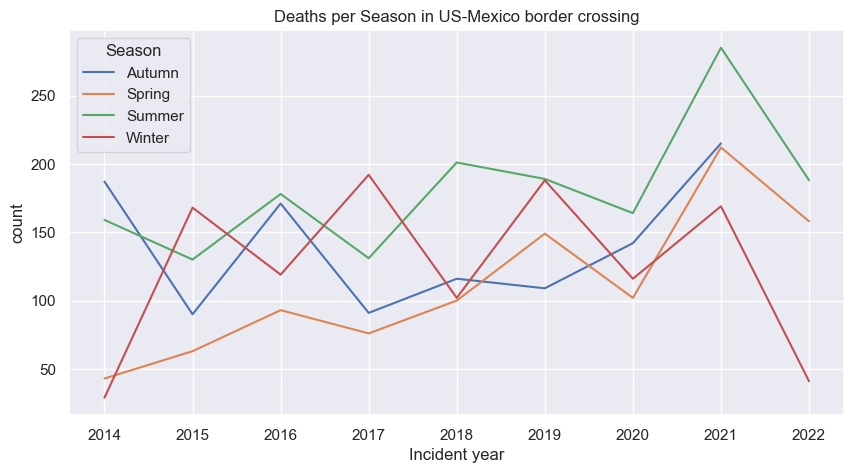

In [207]:
plot_deaths_season('US-Mexico border crossing',df1)

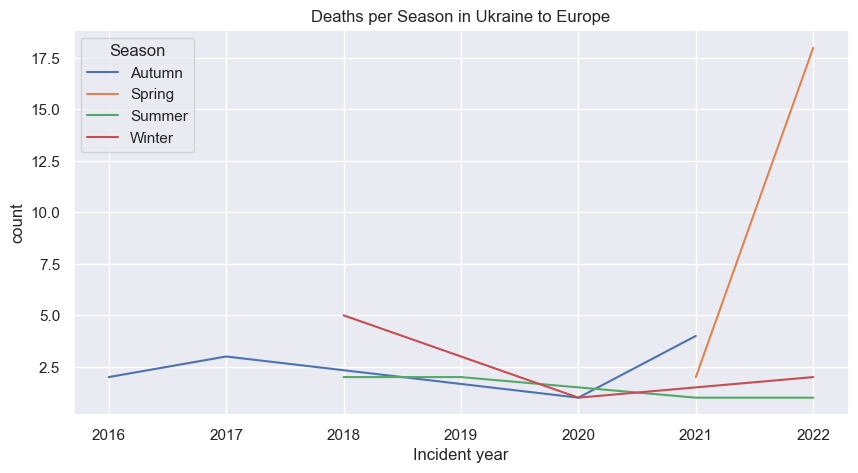

In [208]:
plot_deaths_season('Ukraine to Europe',df1)

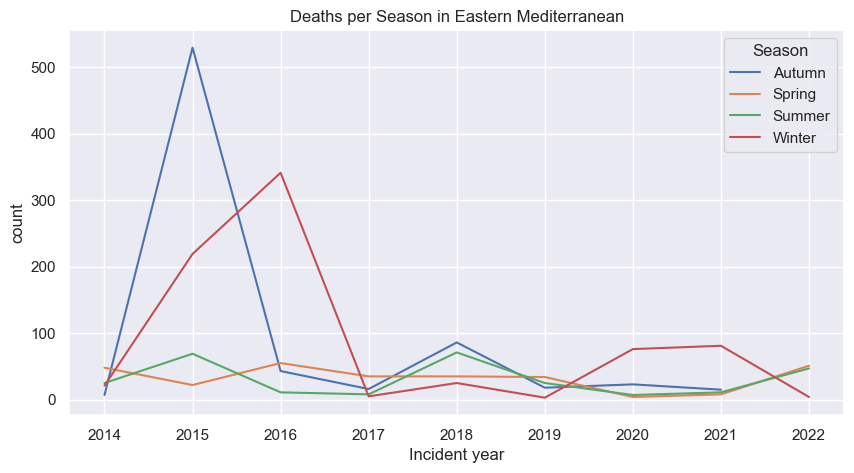

In [209]:
plot_deaths_season('Eastern Mediterranean',df1)

In [210]:
df[['Migration route','Cause of Death']].value_counts().reset_index(name='count')

,Migration route,Cause of Death,count
0,US-Mexico border crossing,Mixed or unknown,1356
1,Sahara Desert crossing,Mixed or unknown,911
2,US-Mexico border crossing,Drowning,770
3,Central Mediterranean,Drowning,700
4,Sahara Desert crossing,Sickness / lack of access to adequate healthcare,537
...,...,...,...
163,Central Mediterranean,Harsh environmental conditions / lack of adequ...,1
164,Central Mediterranean,"Drowning, Mixed or unknown",1
165,Ukraine to Europe,Harsh environmental conditions / lack of adequ...,1
166,Central Mediterranean,"Drowning, Harsh environmental conditions / lac...",1


In [211]:
df2 = df.groupby(['Migration route','Cause of Death'])['Total Number of Dead and Missing'].sum().reset_index(name='Total Number of Dead and Missing')

In [212]:
df2

,Migration route,Cause of Death,Total Number of Dead and Missing
0,Afghanistan to Iran,Accidental death,321
1,Afghanistan to Iran,Drowning,7
2,Afghanistan to Iran,Harsh environmental conditions / lack of adequ...,32
3,Afghanistan to Iran,Mixed or unknown,48
4,Afghanistan to Iran,Sickness / lack of access to adequate healthcare,154
...,...,...,...
163,Western Mediterranean,Harsh environmental conditions / lack of adequ...,35
164,Western Mediterranean,Mixed or unknown,173
165,Western Mediterranean,Sickness / lack of access to adequate healthcare,9
166,Western Mediterranean,Vehicle accident / death linked to hazardous t...,54


In [213]:
def plot_deaths_cause(m_route,df):
    dft = df[df['Migration route'] == m_route].sort_values(by='Total Number of Dead and Missing',ascending=False)
    sns.set(rc={"figure.figsize":(12, 5)})

    fig = sns.barplot(data=dft,x='Cause of Death',y='Total Number of Dead and Missing')
    fig.set(title=f"Cause of Death in {m_route}")
    fig.set_xticklabels(fig.get_xticklabels(), rotation=30, horizontalalignment='right')
    fig.patches[0].set_facecolor('salmon')
    for i in range(1,len(fig.patches)):
        fig.patches[i].set_facecolor('grey')
    plt.show()

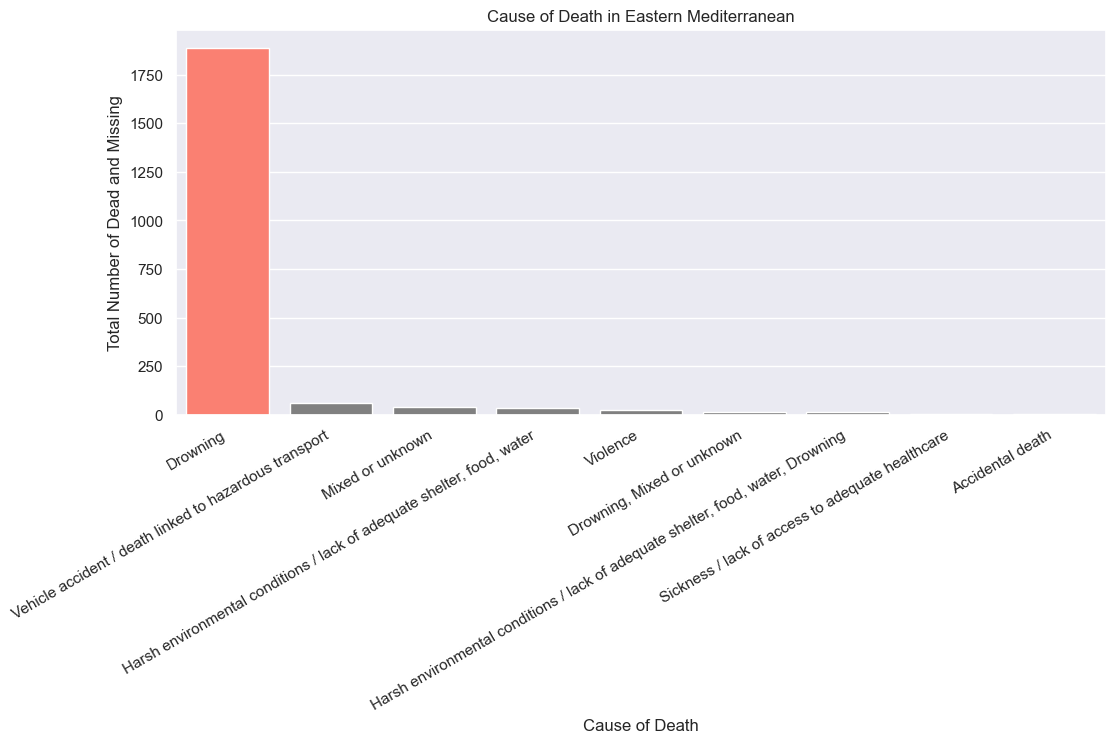

In [214]:
plot_deaths_cause('Eastern Mediterranean',df2)

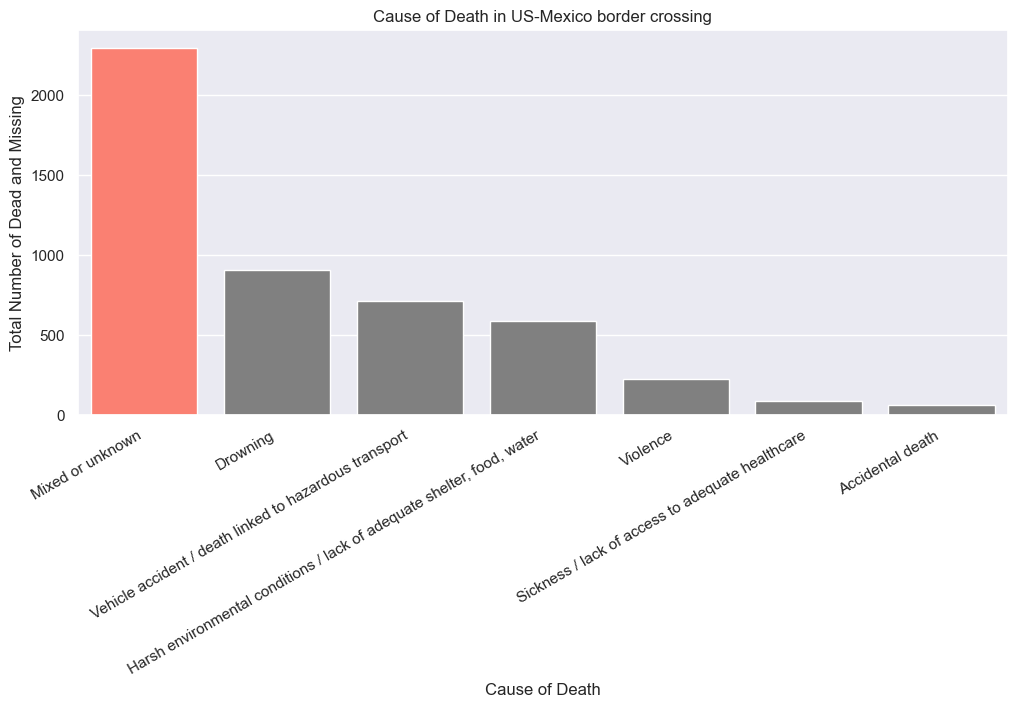

In [215]:
plot_deaths_cause('US-Mexico border crossing',df2)

In [216]:
df.columns

Index(['Unnamed: 0', 'Main ID', 'Incident ID', 'Incident Type',
       'Region of Incident', 'Incident year', 'Reported Month',
       'Number of Dead', 'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Country of Origin', 'Region of Origin', 'Cause of Death',
       'Migration route', 'Location of death', 'Information Source',
       'Coordinates', 'UNSD Geographical Grouping', 'X', 'Y', 'Season'],
      dtype='object')

In [217]:
df['Number of Survivors'].describe()

count    11170.000000
mean         6.652820
std         44.271662
min         -2.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1950.000000
Name: Number of Survivors, dtype: float64

In [218]:
df[df['Number of Survivors'] > 1000][['Number of Survivors','Total Number of Dead and Missing']]

,Number of Survivors,Total Number of Dead and Missing
1646,1950,2
1949,1050,1


In [219]:
m_route = df['Migration route'].unique().tolist()[:3]
cause = df['Cause of Death'].unique().tolist()[:3]

In [220]:
dft = df[(df['Migration route'].isin(m_route)) & (df['Cause of Death'].isin(cause))]

In [221]:
df[(df['Migration route'].isin( m_route)) & (df['Cause of Death'].isin(cause))]

,Unnamed: 0,Main ID,Incident ID,Incident Type,Region of Incident,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Region of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,X,Y,Season
0,0,2014.MMP00001,2014.MMP00001,Incident,North America,2014,January,1,0,1,...,Central America,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-110.366453 31.650259),Northern America,-110.366453,31.650259,Winter
1,1,2014.MMP00002,2014.MMP00002,Incident,North America,2014,January,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-111.73756 31.59713),Northern America,-111.737560,31.597130,Winter
2,2,2014.MMP00003,2014.MMP00003,Incident,North America,2014,January,1,0,1,...,Latin America / Caribbean (P),Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-113.01125 31.94026),Northern America,-113.011250,31.940260,Winter
3,3,2014.MMP00004,2014.MMP00004,Incident,North America,2014,January,1,0,1,...,Central America,Violence,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",POINT (-109.315632 31.506777),Northern America,-109.315632,31.506777,Winter
4,4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014,January,1,0,1,...,Northern Africa,Harsh environmental conditions / lack of adequ...,Belarus-EU border,Border between Russia and Estonia,EUBusiness (Agence France-Presse),POINT (28 59.1551),Northern Europe,28.000000,59.155100,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,11141,2022.MMP969,2022.MMP969,Incident,North America,2022,July,0,1,1,...,Central America,Harsh environmental conditions / lack of adequ...,US-Mexico border crossing,Undetermined location South of Marana in the A...,Univision Arizona,POINT (-111.25281 32.41202369),Northern America,-111.252810,32.412024,Summer
11140,11142,2022.MMP970,2022.MMP970,Incident,North America,2022,July,1,0,1,...,Central America,Harsh environmental conditions / lack of adequ...,US-Mexico border crossing,"Unspecified location in the Tuscon, Arizona de...","Diario Presente, NVI Noticias",POINT (-111.143178 31.926363),Northern America,-111.143178,31.926363,Summer
11142,11144,2022.MMP972,2022.MMP972,Incident,North America,2022,July,1,0,1,...,Central America,Harsh environmental conditions / lack of adequ...,US-Mexico border crossing,"Unspecified location in the desert, San Pasqua...","NVI Noticias, Aristegui Noticias",POINT (-114.810549 33.04307),Northern America,-114.810549,33.043070,Summer
11143,11145,2022.MMP973,2022.MMP973,Incident,North America,2022,May,0,1,1,...,Central America,Mixed or unknown,US-Mexico border crossing,Unspecified location in a warehouse in McAllen...,La Marea,POINT (-98.290059 26.144776),Northern America,-98.290059,26.144776,Spring


In [222]:
df['Cause of Death'].unique().tolist()

['Mixed or unknown',
 'Violence',
 'Harsh environmental conditions / lack of adequate shelter, food, water',
 'Drowning',
 'Vehicle accident / death linked to hazardous transport',
 'Sickness / lack of access to adequate healthcare',
 'Accidental death',
 'Mixed or unknown, Drowning',
 'Drowning, Mixed or unknown',
 'Drowning, Harsh environmental conditions / lack of adequate shelter, food, water',
 'Drowning, Vehicle accident / death linked to hazardous transport',
 'Harsh environmental conditions / lack of adequate shelter, food, water, Drowning',
 'Harsh environmental conditions / lack of adequate shelter, food, water, Sickness / lack of access to adequate healthcare',
 'Mixed or unknown, Harsh environmental conditions / lack of adequate shelter, food, water',
 'Vehicle accident / death linked to hazardous transport, Violence, Mixed or unknown',
 'Harsh environmental conditions / lack of adequate shelter, food, water, Violence',
 'Drowning, Sickness / lack of access to adequate heal

In [223]:
CoD_short = [('Harsh environmental conditions / lack of adequate shelter, food, water','EnvCond / LackOfBasics'),
('Vehicle accident / death linked to hazardous transport','VehicleAccident / HazardousTransp'),
('Sickness / lack of access to adequate healthcare','Sickness / LackHealthcare')
]

In [224]:
def abbreviate(x):
    for i in CoD_short:
        x = str(x).replace(i[0],i[1])
    return x


In [225]:
df['Cause of Death Abbreviation'] = df['Cause of Death'].apply(lambda x: abbreviate(x))

In [226]:
df['Cause of Death Abbreviation']

0              Mixed or unknown
1              Mixed or unknown
2              Mixed or unknown
3                      Violence
4        EnvCond / LackOfBasics
                  ...          
11165          Mixed or unknown
11166                  Drowning
11167    EnvCond / LackOfBasics
11168    EnvCond / LackOfBasics
11169    EnvCond / LackOfBasics
Name: Cause of Death Abbreviation, Length: 11170, dtype: object

In [227]:
CoD_short[0][0]

'Harsh environmental conditions / lack of adequate shelter, food, water'

In [228]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [229]:
df.to_csv('../Missing_Migrants_Global_Figures_filtered.csv',index=False)

In [230]:
df.shape

(11170, 25)

In [231]:
df.columns

Index(['Main ID', 'Incident ID', 'Incident Type', 'Region of Incident',
       'Incident year', 'Reported Month', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Country of Origin', 'Region of Origin', 'Cause of Death',
       'Migration route', 'Location of death', 'Information Source',
       'Coordinates', 'UNSD Geographical Grouping', 'X', 'Y', 'Season',
       'Cause of Death Abbreviation'],
      dtype='object')

In [232]:
df.groupby(['Migration route','Cause of Death'])[['Total Number of Dead and Missing','Minimum Estimated Number of Missing','Number of Females', 'Number of Males', 'Number of Children','Number of Survivors']].sum().reset_index()

,Migration route,Cause of Death,Total Number of Dead and Missing,Minimum Estimated Number of Missing,Number of Females,Number of Males,Number of Children,Number of Survivors
0,Afghanistan to Iran,Accidental death,321,0,1,308,7,1
1,Afghanistan to Iran,Drowning,7,0,0,8,0,0
2,Afghanistan to Iran,Harsh environmental conditions / lack of adequ...,32,0,3,25,4,0
3,Afghanistan to Iran,Mixed or unknown,48,0,13,31,8,0
4,Afghanistan to Iran,Sickness / lack of access to adequate healthcare,154,0,19,126,14,0
...,...,...,...,...,...,...,...,...
163,Western Mediterranean,Harsh environmental conditions / lack of adequ...,35,9,6,10,6,229
164,Western Mediterranean,Mixed or unknown,173,76,322,45,5,552
165,Western Mediterranean,Sickness / lack of access to adequate healthcare,9,0,0,9,1,0
166,Western Mediterranean,Vehicle accident / death linked to hazardous t...,54,3,1,21,8,72


In [233]:
df.groupby(['Migration route','Incident year', 'Reported Month'])[['Total Number of Dead and Missing','Minimum Estimated Number of Missing','Number of Females', 'Number of Males', 'Number of Children','Number of Survivors']].sum().reset_index()

,Migration route,Incident year,Reported Month,Total Number of Dead and Missing,Minimum Estimated Number of Missing,Number of Females,Number of Males,Number of Children,Number of Survivors
0,Afghanistan to Iran,2014,July,1,0,0,0,0,0
1,Afghanistan to Iran,2015,October,20,0,0,0,0,0
2,Afghanistan to Iran,2015,September,2,0,0,0,0,0
3,Afghanistan to Iran,2016,September,14,0,0,0,0,11
4,Afghanistan to Iran,2017,April,7,0,0,4,0,15
...,...,...,...,...,...,...,...,...,...
1323,Western Mediterranean,2022,January,31,14,6,5,5,25
1324,Western Mediterranean,2022,July,14,12,0,1,0,2
1325,Western Mediterranean,2022,June,34,3,0,3,1,17
1326,Western Mediterranean,2022,March,10,3,0,10,0,13


In [234]:
df['date'] = df[['Incident year','Reported Month']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [235]:
df['date'] = df['date'] + '-1'

In [236]:
df['date'] = pd.to_datetime(df['date'])

In [237]:
df3 = df.groupby(['Migration route','date'])[['Total Number of Dead and Missing','Minimum Estimated Number of Missing','Number of Females', 'Number of Males', 'Number of Children','Number of Survivors']].sum().reset_index()

In [238]:
df3.head()

,Migration route,date,Total Number of Dead and Missing,Minimum Estimated Number of Missing,Number of Females,Number of Males,Number of Children,Number of Survivors
0,Afghanistan to Iran,2014-07-01,1,0,0,0,0,0
1,Afghanistan to Iran,2015-09-01,2,0,0,0,0,0
2,Afghanistan to Iran,2015-10-01,20,0,0,0,0,0
3,Afghanistan to Iran,2016-09-01,14,0,0,0,0,11
4,Afghanistan to Iran,2017-01-01,5,0,0,5,0,0


In [239]:
df3 = df.groupby(['Migration route','Cause of Death','Cause of Death Abbreviation'])[['Total Number of Dead and Missing','Minimum Estimated Number of Missing','Number of Females', 'Number of Males', 'Number of Children','Number of Survivors']].agg(pd.Series.sum).reset_index()

In [240]:
df3.T

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
Migration route,Afghanistan to Iran,Afghanistan to Iran,Afghanistan to Iran,Afghanistan to Iran,Afghanistan to Iran,Afghanistan to Iran,Afghanistan to Iran,Belarus-EU border,Belarus-EU border,Belarus-EU border,...,Western Balkans,Western Mediterranean,Western Mediterranean,Western Mediterranean,Western Mediterranean,Western Mediterranean,Western Mediterranean,Western Mediterranean,Western Mediterranean,Western Mediterranean
Cause of Death,Accidental death,Drowning,Harsh environmental conditions / lack of adequ...,Mixed or unknown,Sickness / lack of access to adequate healthcare,Vehicle accident / death linked to hazardous t...,Violence,Accidental death,Drowning,Harsh environmental conditions / lack of adequ...,...,Violence,Accidental death,Drowning,"Drowning, Harsh environmental conditions / lac...","Drowning, Vehicle accident / death linked to h...",Harsh environmental conditions / lack of adequ...,Mixed or unknown,Sickness / lack of access to adequate healthcare,Vehicle accident / death linked to hazardous t...,Violence
Cause of Death Abbreviation,Accidental death,Drowning,EnvCond / LackOfBasics,Mixed or unknown,Sickness / LackHealthcare,VehicleAccident / HazardousTransp,Violence,Accidental death,Drowning,EnvCond / LackOfBasics,...,Violence,Accidental death,Drowning,"Drowning, EnvCond / LackOfBasics","Drowning, VehicleAccident / HazardousTransp",EnvCond / LackOfBasics,Mixed or unknown,Sickness / LackHealthcare,VehicleAccident / HazardousTransp,Violence
Total Number of Dead and Missing,321,7,32,48,154,632,206,2,1,11,...,25,11,2564,5,6,35,173,9,54,32
Minimum Estimated Number of Missing,0,0,0,0,0,0,7,0,0,0,...,0,0,1800,1,3,9,76,0,3,0
Number of Females,1,0,3,13,19,21,14,0,0,1,...,0,36,870,0,2,6,322,0,1,24
Number of Males,308,8,25,31,126,423,142,2,1,9,...,17,7,655,0,1,10,45,9,21,9
Number of Children,7,0,4,8,14,44,13,2,0,1,...,1,1,98,1,0,6,5,1,8,0
Number of Survivors,1,0,0,0,0,152,18,0,0,2,...,42,17,2431,12,48,229,552,0,72,17


In [241]:
df3.head()

,Migration route,Cause of Death,Cause of Death Abbreviation,Total Number of Dead and Missing,Minimum Estimated Number of Missing,Number of Females,Number of Males,Number of Children,Number of Survivors
0,Afghanistan to Iran,Accidental death,Accidental death,321,0,1,308,7,1
1,Afghanistan to Iran,Drowning,Drowning,7,0,0,8,0,0
2,Afghanistan to Iran,Harsh environmental conditions / lack of adequ...,EnvCond / LackOfBasics,32,0,3,25,4,0
3,Afghanistan to Iran,Mixed or unknown,Mixed or unknown,48,0,13,31,8,0
4,Afghanistan to Iran,Sickness / lack of access to adequate healthcare,Sickness / LackHealthcare,154,0,19,126,14,0


In [242]:
def plot_deaths_cause(m_route,cause,df):
    dft = df[(df['Migration route'] == m_route) & (df['Cause of Death'].isin(cause))].sort_values(by='Total Number of Dead and Missing',ascending=False)
    sns.set(rc={"figure.figsize":(12, 5)})

    fig = sns.barplot(data=dft,x='Cause of Death',y=[['Total Number of Dead and Missing']])
    fig.set(title=f"Cause of Death in {m_route}")
    fig.set_xticklabels(fig.get_xticklabels(), rotation=30, horizontalalignment='right')
    fig.patches[0].set_facecolor('salmon')
    for i in range(1,len(fig.patches)):
        fig.patches[i].set_facecolor('grey')
    plt.show()

In [243]:
plot_deaths_cause('Eastern Mediterranean',['Violence'],df3)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [244]:
df = pd.read_csv('../Missing_Migrants_Global_Figures_filtered.csv')

In [263]:
df[(df['Migration route'] =='US-Mexico border crossing') & (df['Incident year'] ==2021) & (df['Cause of Death Abbreviation'] == 'Mixed or unknown') & (df['X'] == 12.54897854)]

,Main ID,Incident ID,Incident Type,Region of Incident,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,...,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,X,Y,Season,Cause of Death Abbreviation
9519,2021.MMP0239,2021.MMP0239,Incident,North America,2021,October,1,0,1,0,...,Mixed or unknown,US-Mexico border crossing,Pima County Office of the Medical Examiner jur...,Pima County Office of the Medical Examiner (PC...,POINT (12.54897854 33.01479981),Northern America,12.548979,33.0148,Autumn,Mixed or unknown


In [ ]:
Central Mediterranean

In [283]:
indexes = df[(df['X'] == 12.54897854)  & (df['Migration route'] == 'US-Mexico border crossing')].index

In [284]:
indexes

Int64Index([], dtype='int64')

In [275]:
df.loc[indexes,'Coordinates'] = 'POINT (-99.4332699 24.215586)'

In [277]:
df.loc[indexes,'Coordinates'].apply(lambda x: get_xy(x))

,X,Y
9308,-99.43327,24.215586
9309,-99.43327,24.215586
9311,-99.43327,24.215586
9316,-99.43327,24.215586
9317,-99.43327,24.215586


In [278]:
df.loc[indexes,'X'] = -99.43327
df.loc[indexes,'Y'] = 24.215586

In [279]:
df.loc[indexes]

,Main ID,Incident ID,Incident Type,Region of Incident,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,...,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,X,Y,Season,Cause of Death Abbreviation
9308,2021.MMP00928,2021.MMP00928,Incident,North America,2021,October,4,0,4,11,...,Vehicle accident / death linked to hazardous t...,US-Mexico border crossing,"Highway 54, Culberson County, Texas, USA","La Opinion, Telemundo",POINT (-99.4332699 24.215586),Northern America,-99.43327,24.215586,Autumn,VehicleAccident / HazardousTransp
9309,2021.MMP00929,2021.MMP00929,Incident,North America,2021,October,1,0,1,36,...,Drowning,US-Mexico border crossing,"San Diego Border Beach, San Diego County, Cali...","USBP, CNN, Telemundo",POINT (-99.4332699 24.215586),Northern America,-99.43327,24.215586,Autumn,Drowning
9311,2021.MMP00931,2021.MMP00931,Incident,North America,2021,October,1,0,1,2,...,Accidental death,US-Mexico border crossing,"2 miles north of Eagle Pass, near Río Bravo, M...",Super Channel 12,POINT (-99.4332699 24.215586),Northern America,-99.43327,24.215586,Autumn,Accidental death
9316,2021.MMP00936,2021.MMP00936,Incident,Central America,2021,October,1,0,1,0,...,Drowning,US-Mexico border crossing,"Río Bravo, near Acuña Municipality, Coahuila, ...",Zócalo,POINT (-99.4332699 24.215586),Central America,-99.43327,24.215586,Autumn,Drowning
9317,2021.MMP00937,2021.MMP00937,Incident,Central America,2021,October,1,0,1,0,...,Vehicle accident / death linked to hazardous t...,US-Mexico border crossing,"Parque Industrial del Desierto neighborhood, i...",Síntesis,POINT (-99.4332699 24.215586),Central America,-99.43327,24.215586,Autumn,VehicleAccident / HazardousTransp


In [264]:
df.iloc[9519]

Main ID                                                                     2021.MMP0239
Incident ID                                                                 2021.MMP0239
Incident Type                                                                   Incident
Region of Incident                                                         North America
Incident year                                                                       2021
Reported Month                                                                   October
Number of Dead                                                                         1
Minimum Estimated Number of Missing                                                    0
Total Number of Dead and Missing                                                       1
Number of Survivors                                                                    0
Number of Females                                                                      0
Number of Males      

In [265]:
df.at[9519,'Migration route'] = 'Central Mediterranean'
df.at[9519,'Region of Incident'] = 'Mediterranean'
df.at[9519,'UNSD Geographical Grouping'] = 'Northern Africa'

In [253]:
df['UNSD Geographical Grouping'].unique()

array(['Northern America', 'Northern Europe', 'Uncategorized',
       'Western Europe', 'Caribbean', 'South-eastern Asia',
       'Southern Asia', 'Central America', 'Eastern Africa',
       'Northern Africa', 'Eastern Asia', 'Western Asia',
       'Eastern Europe', 'Southern Europe', 'Western Africa',
       'South America', 'Southern Africa', 'Middle Africa',
       'Central Asia'], dtype=object)

In [256]:
df.iloc[10167]

Main ID                                                                     2021.MMP0889
Incident ID                                                                 2021.MMP0889
Incident Type                                                                   Incident
Region of Incident                                                         Mediterranean
Incident year                                                                       2021
Reported Month                                                                   October
Number of Dead                                                                         1
Minimum Estimated Number of Missing                                                    0
Total Number of Dead and Missing                                                       1
Number of Survivors                                                                    0
Number of Females                                                                      0
Number of Males      

In [280]:
df.to_csv('../Missing_Migrants_Global_Figures_filtered.csv',index=False)